<a href="https://colab.research.google.com/github/ImranRiazChohan/EyeGazeMovementDetection/blob/main/TrainingEyeGazeMovementClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.losses import categorical_crossentropy,sparse_categorical_crossentropy
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16 
from google.colab.patches import cv2_imshow

In [2]:
#Read Data From Directory
Orignal_dir="/content/drive/MyDrive/Internship_TechroticsLab/EyeGazeMovementDetector/EyeData"
Train_data_dir=os.path.join(Orignal_dir,"train")
train_center=os.path.join(Train_data_dir,"center")
train_left=os.path.join(Train_data_dir,"left")
train_right=os.path.join(Train_data_dir,"right")

In [3]:
left_data=os.listdir(train_left)
center_data=os.listdir(train_center)
right_data=os.listdir(train_right)

In [4]:
print(" Left Data",len(left_data),"\n","Right Data",
len(right_data),"\n","Center Data", 
len(center_data))

 Left Data 1224 
 Right Data 1173 
 Center Data 1225


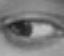

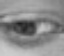

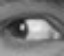

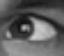

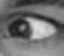

In [5]:
for i in range(0,5):
  path=train_left+'/'+left_data[i]
  image=cv2.imread(path)
  cv2_imshow(image)

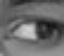

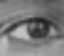

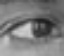

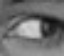

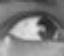

In [6]:
for i in range(0,5):
  path=train_right+'/'+right_data[i]
  image=cv2.imread(path)
  cv2_imshow(image)

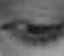

(56, 64, 3)


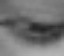

(56, 64, 3)


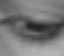

(56, 64, 3)


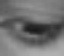

(56, 64, 3)


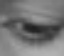

(56, 64, 3)


In [7]:
for i in range (0,5):
  path=train_center+"/"+center_data[i]
  image=cv2.imread(path)
  cv2_imshow(image)
  print(image.shape)

In [8]:
image.ndim

3

In [10]:
test_data_dir=os.path.join(Orignal_dir,"test")
test_center_data=os.path.join(test_data_dir,"center")
test_left_data=os.path.join(test_data_dir,"left")
test_right_data=os.path.join(test_data_dir,"right")

In [11]:
test_left=os.listdir(test_center_data)
test_right=os.listdir(test_right_data)
test_center=os.listdir(test_center_data)

In [13]:
print("left:{}\nright:{}\ncenter:{}".format(len(test_left),len(test_right),len(test_center)))

left:243
right:315
center:243


In [ ]:
train_data_gen=ImageDataGenerator(rotation_range=10,
                                  rescale=1./255,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  fill_mode="nearest")
test_data_gen=ImageDataGenerator(rescale=1./255)
valid_data_gen=ImageDataGenerator(rescale=1./255)